# Assignment 1 : Text Classification.
 
This file contains the second bullet point of part A, the derivation of the gradient of the objective function of logistsic regression. 

The implementations can be found in the respective files. 
- regression.py : Logistic Regression. 
- multiclass_regression.py : Multi-class Regression. 


# 1. Data Preprocessing:

## 1.1 Load Data

In [1]:
from data_preprocessing import SMSSpamPreprocessor 
from data_preprocessing import TextPreprocessor as PP
import pandas as pd

[nltk_data] Downloading package punkt to /home/testme/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/testme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
""" Write each line to seperate list """
SMS_Preprocessor = SMSSpamPreprocessor()
sentences, labels = SMS_Preprocessor.load_data_from_file(filepath="data/SMSSpamCollection")
print(sentences[:5])
print(labels[:5])

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]
['ham', 'ham', 'spam', 'ham', 'ham']


## 1.2 Label Distribution.
Should watch out for model over-fitting to ham

In [3]:
""" Get Data Split """
data_split = SMS_Preprocessor.get_data_splits()

📬 Loaded SMS Spam data 📬 from file. With 
 5574 sentences and 
 5574 labels 


## 1.3 Preprocessing Data
- Remove punctuation, urls, numbers, Change text to lower case. 


In [4]:
TextPreprocessor = PP(sentences, labels)
data_series = pd.Series(sentences, name="text")
labels_series = pd.Series(labels, name="label")
df = pd.DataFrame({"text": data_series, "label": labels_series})
# Examples of Punctuation, Urls and Numbers
sentence_with_punctuation = df["text"].str.contains(r'[^\w\s]', regex=True)
sentence_with_urls = df["text"].str.contains(r'http[s]?://', regex=True)
sentence_with_numbers = df["text"].str.contains(r'\d', regex=True)
example_df = df[sentence_with_punctuation | sentence_with_urls | sentence_with_numbers].sample(5)
print("Sweeping for examples ...🧹🧹")
print(example_df.head())

""" Clean Text, run a few times to see the difference for each """
print("Cleaning...🧼🧼")
cleaned_text = TextPreprocessor._clean_text(text=example_df["text"])
print(cleaned_text[:5])

Sweeping for examples ...🧹🧹
                                                   text label
1705  What can i do? Might accidant tookplace betwee...   ham
4276  Haiyoh... Maybe your hamster was jealous of mi...   ham
1739                 K go and sleep well. Take rest:-).   ham
5431  Er yeah, i will b there at 15:26, sorry! Just ...   ham
3365    Yo my trip got postponed, you still stocked up?   ham
Cleaning...🧼🧼
1705    what can i do might accidant tookplace between...
4276     haiyoh maybe your hamster was jealous of million
1739                        k go and sleep well take rest
5431    er yeah i will b there at  sorry just tell me ...
3365        yo my trip got postponed you still stocked up
Name: text, dtype: object


### 1.3.1 Tokenize And Remove Stopwords 

In [5]:
# Stop word Examples: 'i' should be the easiest to see removed
print("Stop word examples...🚫🚫")
stop_words = TextPreprocessor._stop_words
print(stop_words[:5])
print("Tokenizing and stemming...🌿🌿")
tokenized_text = TextPreprocessor._tokenize_and_stem(text=cleaned_text)
print(tokenized_text[:5])


Stop word examples...🚫🚫
['i', 'me', 'my', 'myself', 'we']
Tokenizing and stemming...🌿🌿
1705    might accid tookplac somewher ghodbandar rd tr...
4276                   haiyoh mayb hamster jealou million
1739                            k go sleep well take rest
5431           er yeah b sorri tell pubcaf sit come wen u
3365                      yo trip got postpon still stock
Name: text, dtype: object


### 1.3.2 Build TF-IDF Vector

In [6]:
example_sentence = tokenized_text.iloc[1] 
print("Example Sentence: " + example_sentence)
print("Creating TF-IDF Vector...✨✨")
# I have already fitted the vectorizer to the training data, when calling get Data Split
# Transform the Sentence
tfidf_vector = SMS_Preprocessor.preprocessor._vectorizer.transform([example_sentence])
# Pretty print the TF-IDF vector
print("Pretty Printing TF-IDF Vector...✨✨")
dense_tfidf = tfidf_vector.todense()
feature_names = SMS_Preprocessor.preprocessor._vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(dense_tfidf, columns=feature_names)
# Filter out zero values
non_zero_tfidf_df = tfidf_df.T[tfidf_df.T[0] != 0]
print(non_zero_tfidf_df)

Example Sentence: haiyoh mayb hamster jealou million
Creating TF-IDF Vector...✨✨
Pretty Printing TF-IDF Vector...✨✨
                0
haiyoh   0.497480
hamster  0.474900
jealou   0.458878
mayb     0.325338
million  0.458878


## 1.4 Easy pipeline/usage

📬 Loaded SMS Spam data 📬 from file. With 
 5574 sentences and 
 5574 labels 


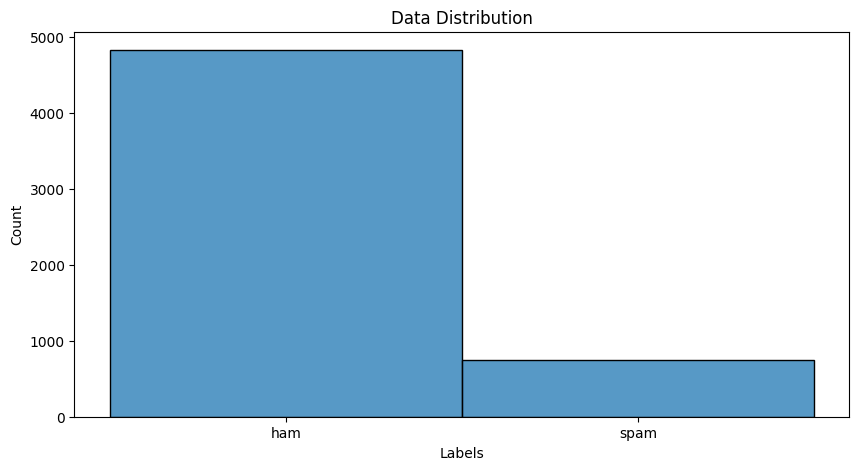

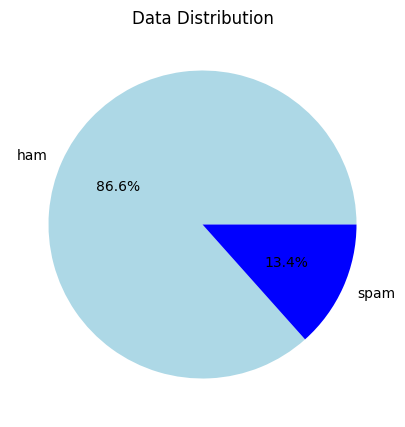

In [7]:
# Create the Preprocessor
# Extracts the data.
DataPreprocessor = SMSSpamPreprocessor(report=True)
# Preprocesses and splits the data.
data_split = DataPreprocessor.get_data_splits()
# Getting Data Splits
X_train, Y_train = data_split["train"]
X_test, Y_test = data_split["test"]
X_val, Y_val = data_split["val"]


# 1.5 Logistic Regression. 

# 1.5.1 Derivation of Objective Function
We want to find the derivation of the Objective function with respect to $w$ and $b$ . Lets represent the Objective function $J$ as
$$   J_{loss}(w,b) = \sum_{i=1}^{N} l_i + R(w) $$
Where $l_i$ is 
$$ l_{i} = -[y*log(\hat{y}) + (1-y)*log(1-\hat{y})] $$
And R is the l2 regularization term
$$  R(w) = \lambda\sum_{j=i}^{d} w_j^2 $$
## (1.5.1).1 Derivative of $l_i$
Using the chain rule, the function has a derivative of 
$$ \frac{\partial l}{\partial w}= \frac{\partial l}{\partial z} * \frac{\partial z}{\partial w} $$
Similarly for $b$
$$ \frac{\partial l}{\partial b}= \frac{\partial l}{\partial z} * \frac{\partial z}{\partial b} $$
### (1.5.1.1).1 First we will find $\frac{\partial l}{\partial z}$ which is equal to
$$ \frac{\partial l}{\partial z} = \frac{\partial l}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial z} $$
#### (1.5.1.1.1).1 We will find $\frac{\partial l}{\partial \hat{y}}$ first
$$ {\frac{\partial l}{\partial \hat{y}}} = {-y_i \over \hat{y_i}} + {(1-y_i) \over (1-\hat{y_i})} $$
Since we know that $\frac{d}{dx}[ln(x)y]={y \over x}$
#### (1.5.1.1.1).2 Next We will find $\frac{\partial \hat{y}}{\partial z}$ which is the Derivative of the Sigmoid function. 
We want to find
$$\frac{d}{dz}[{1 \over 1 + e^{-z}}] = \frac{d}{dz}[(1+e^{-z})^{-1}] $$
Using the **Reciprocal Rule** we find that 
$$ \frac{d}{dz}[(1+e^{-z})^{-1}] = -(1+e^{-z})^{-2} * \frac{d}{dz}[(1+e^{-z})] $$
The first term $(1+e^{-z})^{-2}$ Will be used in the final calculation. 
Calculating the other term gives
$$ \frac{d}{dz}[1] + \frac{d}{dz}[e^{-z}]$$
The 1 is dropped out and the $[e^{-z}]$ term derivates to 
$$ e^{-z} * \frac{d}{dz}[-z] $$
Given that the last term here is $-1$ Lets combine $-e^{-z}$ with $(1+e^{-z})^{-2}$ from earlier
$$\frac{d}{dz}[(1+e^{-z})^{-1}]= { e^{-x} \over (1+e^{-z})^2} $$
This is the final derivation of the sigmoid function, however rearranging the terms gives us something more readable. 
$$ \sigma(z) (1-\sigma(z))$$
Where $\sigma(z) = {1 \over 1 + e^{-z}}$
#### (1.5.1.1.1).3 Combining Using Chain Rule
To recap, we have found 
$$ {\frac{\partial l}{\partial \hat{y}}} = {-y_i \over \hat{y_i}} + {(1-y_i) \over (1-\hat{y_i})} $$
And 
$$\frac{\partial \hat{y_i}}{\partial z} = \hat{y_i} - (1-\hat{y_i})$$
After multiplying as a result of the chain rule we find
$$ \frac{\partial l}{\partial z} = \hat{y_i} - y  $$
### (1.5.1.1).2 Next find $\frac{\partial z}{\partial w}$
Since $$z = w^Tx_i+b$$
then $$\frac{\partial z}{\partial w} = x_i$$
### (1.5.1.1).3 Concluding $l_i$
$$ \frac{\partial l}{\partial w}= \frac{\partial l}{\partial z} * \frac{\partial z}{\partial w} = (\hat{y_i} - y )x_i$$
Using $\frac{\partial l}{\partial z}$ will also help for $b$
$$ \frac{\partial l}{\partial b} = \frac{\partial l}{\partial z} * \frac{\partial z}{\partial b} =  \hat{y_i} - y  $$
## (1.5.1).2 L2 Regularization derivation 
If the regularization term is 
$$ R(w) = \lambda\sum_{j=i}^{d} w_j^2 $$
With Respect to $w$ and $b$ L2 Regularization is 
$$ \frac{\partial R}{\partial w}= 2 \lambda \sum_{j=i}^{d} w_j $$
$$ \frac{\partial R}{\partial b} = 0 $$
## (1.5.1).3 Conclusion
The Gradient of $J$ with Respect to $w$ and $b$ is
$$ J_{loss}(w,b) = \sum_{i=1}^{N} l_i + R(w) $$
Therefore the gradient of $J$ is 
$$ \nabla J_{loss}(w,b) = (  \frac{\partial l}{\partial w} + \frac{\partial R}{\partial w}, \frac{\partial l}{\partial b} + \frac{\partial R}{\partial b} )$$

With Respect to only $w$
$$  \nabla J_{loss}(w) = \sum_{i=1}^{N}(\hat{y_i} - y )x_i +  2 \lambda \sum_{j=i}^{d} w_j = \sum_{i=1}^{N}( \sigma (w^Tx_i) - y )x_i + 2 \lambda \sum_{j=i}^{d} w_j$$
With Respect to only $b$
$$  \nabla J_{loss}(b) = \sum_{i=1}^{N}(\hat{y_i} - y ) = \sum_{i=1}^{N}( \sigma (w^Tx_i) - y )$$
With Respect to both $w$ and $b$
$$ \nabla J_{loss}(w,b) = ([\sum_{i=1}^{N}(\hat{y_i} - y )x_i + 2 \lambda \sum_{j=i}^{d} w_j] , [\sum_{i=1}^{N}(\hat{y_i} - y ))  $$

# 1.6 Logistic Regression Usage

In [8]:
# see regression.py for implementation
# Running the regression file `python regression.py` does this much faster. 
from regression import LogisticRegression

## 1.6.1 Using Batch Gradient Descent

Might Benefit from higher learning rate. 

📬 Loaded SMS Spam data 📬 from file. With 
 5574 sentences and 
 5574 labels 
Using Method 🧠: batch
Validation set evaluation: 📊
Accuracy: 98.03% 🎯
Precision: 0.98
Recall: 0.85
F1 Score: 0.91
Test set evaluation: 📊
Accuracy: 97.13% 🎯
Precision: 0.98
Recall: 0.82
F1 Score: 0.89
        Cost
0   0.676931
1   0.661410
2   0.646528
3   0.632248
4   0.618537
..       ...
95  0.204695
96  0.203221
97  0.201769
98  0.200338
99  0.198928

[100 rows x 1 columns]


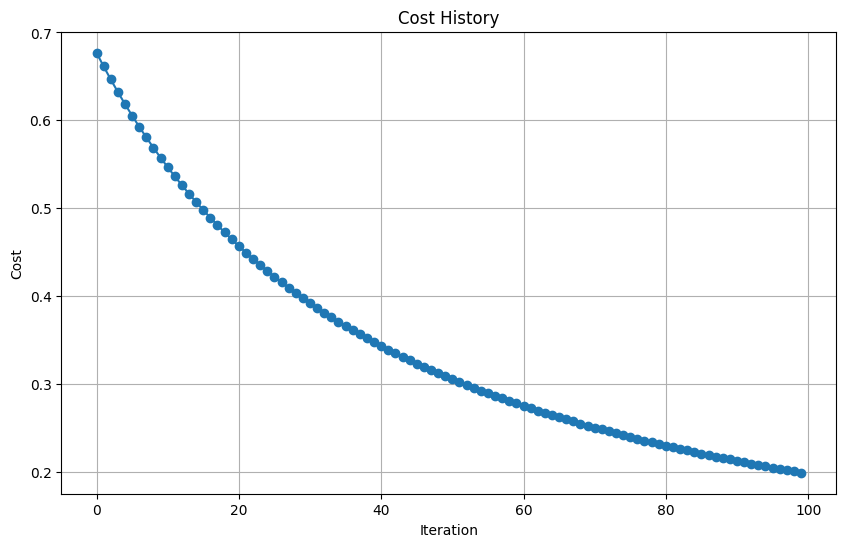

In [9]:
# Preprocess the data
SMSSpam = SMSSpamPreprocessor()
split_data = SMSSpam.get_data_splits()

X_train, y_train = split_data["train"]
X_val, y_val = split_data["val"]
X_test, y_test = split_data["test"]

run_batch = True 
if run_batch:
    alpha = 0.01 
    max_iter = 100

    # Train final model with the best lambda
    lr_batch = LogisticRegression(learning_rate=alpha, num_iterations=max_iter)
    w_batch, b_batch, cost_history_batch = lr_batch.fit(X_train, y_train, method="batch") # "stochastic" | "batch" | "mini_batch" default is batch

    # Evaluate on validation set
    print("Validation set evaluation: 📊")
    lr_batch.evaluate(X_val, y_val, w_batch, b_batch)

    # Evaluate on test set
    print("Test set evaluation: 📊")
    lr_batch.evaluate(X_test, y_test, w_batch, b_batch)
    lr_batch.pretty_print_cost_history(cost_history=cost_history_batch)


## 1.6.2 Stocastic GD

Low Loss value but sensitive to learning rate. Use small values. Early Stopping would also help here

In [10]:
run_sto = False
if run_sto:
    alpha = 1e-5
    max_iter = 100

    # Train final model with the best lambda
    lr_sto = LogisticRegression(learning_rate=alpha, num_iterations=max_iter)
    w_sto, b_sto, cost_history_sto = lr_sto.fit(X_train, y_train, method="stochastic") # "stochastic" | "batch" | "mini_batch"

    # Evaluate on validation set
    print("Validation set evaluation: 📊")
    lr_sto.evaluate(X_val, y=y_val, w=w_sto, b=b_sto)

    # Evaluate on test set
    print("Test set evaluation: 📊")
    lr_sto.evaluate(X_test, y=y_test, w=w_sto, b=b_sto)
    lr_sto.pretty_print_cost_history(cost_history=cost_history_sto)

## 1.6.3 Mini-Batch GD

Early stopping would help here. Using a Slower Learning rate also to converge slower. 

In [11]:
run_mini = False
if run_mini:
    alpha = 1e-5
    max_iter = 100

    # Train final model with the best lambda
    lr_mini = LogisticRegression(learning_rate=alpha, num_iterations=max_iter)
    w_mini, b_mini, cost_history_mini = lr_mini.fit(X_train, y_train, method="mini_batch") 

    # Evaluate on validation set
    print("Validation set evaluation: 📊")
    lr_mini.evaluate(X_test=X_val, y=y_val, w=w_mini, b=b_mini)

    # Evaluate on test set
    print("Test set evaluation: 📊")
    lr_mini.evaluate(X_test, y=y_test, w=w_mini, b=b_mini)
    lr_mini.pretty_print_cost_history(cost_history=cost_history_sto)

# 1.7 Cross-Validation


Test different learning rates with KFold Cross Validation batch GD, Best Lambda result: 0.01 

In [12]:
from regression import cross_validate_lambda
# Define range of lambda values to test
lambdas = [0.01, 0.05, 0.1, 0.5, 1.0]
best_lambda = cross_validate_lambda(X_train, y_train, lambdas)
print(f"Best Lambda: {best_lambda} 👑")

Using Method 🧠: batch
Accuracy: 97.06% 🎯
Precision: 0.98
Recall: 0.80
F1 Score: 0.88
Using Method 🧠: batch
Accuracy: 97.57% 🎯
Precision: 1.00
Recall: 0.80
F1 Score: 0.89
Using Method 🧠: batch
Accuracy: 97.95% 🎯
Precision: 1.00
Recall: 0.85
F1 Score: 0.92
Using Method 🧠: batch
Accuracy: 97.56% 🎯
Precision: 0.99
Recall: 0.82
F1 Score: 0.90
Using Method 🧠: batch
Accuracy: 95.77% 🎯
Precision: 0.95
Recall: 0.74
F1 Score: 0.84
Lambda: 0.01, Average F1 Score: 0.88 📈
Using Method 🧠: batch
Accuracy: 97.06% 🎯
Precision: 0.98
Recall: 0.80
F1 Score: 0.88
Using Method 🧠: batch
Accuracy: 97.57% 🎯
Precision: 1.00
Recall: 0.80
F1 Score: 0.89
Using Method 🧠: batch
Accuracy: 97.95% 🎯
Precision: 1.00
Recall: 0.85
F1 Score: 0.92
Using Method 🧠: batch
Accuracy: 97.56% 🎯
Precision: 0.99
Recall: 0.82
F1 Score: 0.90
Using Method 🧠: batch
Accuracy: 95.77% 🎯
Precision: 0.95
Recall: 0.74
F1 Score: 0.84
Lambda: 0.05, Average F1 Score: 0.88 📈
Using Method 🧠: batch
Accuracy: 97.06% 🎯
Precision: 0.98
Recall: 0.80
F1

# 1.7 Conclusion. 

## 1.7.1
The confusion matrix shows that we are are overpredicting "ham" allowing unwanted spam messages to get through. Solutions for this:
1. Raising the threshold can make the model more confident before classifying as ham, reducing false negatives. 
2. Assigning a higher weight to spam messages can help the model focus on correctly identifying them. 
3. Incorporating additional spam-indicative features like special characters, word frequency, or email metadata can improve classification.
## 1.7.2
In comparing the F1 scores, Stochastic Gradient Descent and batch Gradient Descent seem to produce the best results. Stochastic Gradient Descent has the best results of these two given the lower loss. However the predictions on the test set are very similar. 

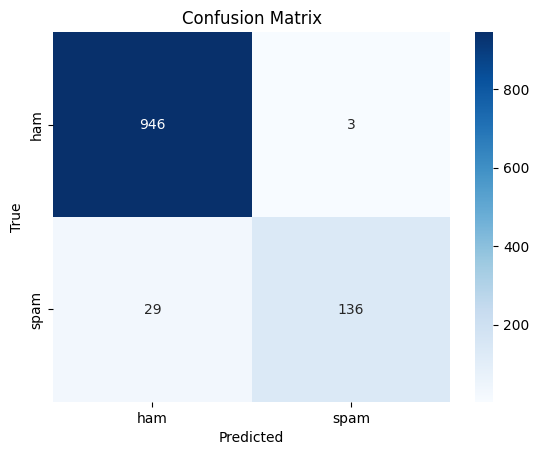

NameError: name 'lr_sto' is not defined

In [13]:
lr_batch.get_confusion_matrix(X_test, y_test, w_batch, b_batch)
lr_sto.get_confusion_matrix(X_test, y_test, w_sto, b_sto)
lr_mini.get_confusion_matrix(X_test, y_test, w_mini, b_mini)

# 1.8 Single Sentence Prediction. 

In [ ]:
from data_preprocessing import SparseMatrix
SENTENCE = " this is a spam message " # Try me!
print("Predicting...🤖🤖")
processed_sentence: SparseMatrix = SMSSpam.preprocess_single_sentence(sentence=SENTENCE)

# Predict using the batch gradient descent model
prediction_batch = lr_batch.predict(X_pred=processed_sentence, w=w_batch, b=b_batch)
print(f"Batch Gradient Descent Prediction: {'spam 🤖' if prediction_batch == 1 else 'ham 🍔'}")

# Predict using the stochastic gradient descent model
prediction_sto = lr_sto.predict(X_pred=processed_sentence, w=w_sto, b=b_sto)
print(f"Stochastic Gradient Descent Prediction: {'spam 🤖' if prediction_sto == 1 else 'ham 🍔'}")

# Predict using the mini-batch gradient descent model
prediction_mini = lr_mini.predict(X_pred=processed_sentence, w=w_mini, b=b_mini)
print(f"Mini-Batch Gradient Descent Prediction: {'spam 🤖' if prediction_mini == 1 else 'ham 🍔'}")

Predicting...🤖🤖
Batch Gradient Descent Prediction: spam 🤖
Stochastic Gradient Descent Prediction: spam 🤖
Mini-Batch Gradient Descent Prediction: spam 🤖


# 2 Multiclass Regression. 

In [ ]:
from multiclass_regression import MulticlassLogisticRegression
from data_preprocessing import SparseMatrix

# 2.1 EDA

In [ ]:
from data_preprocessing import BookPreprocessor
data: BookPreprocessor = BookPreprocessor()
split_data = (
    data.get_data_splits()
)
X_train, y_train = split_data["train"]
X_val, y_val = split_data["val"]
X_test, y_test = split_data["test"]

📬 Loaded Book data 📬 from file. With 
 19536 sentences and 
 19536 labels 
Unique Labels: {'Arthur Conan Doyle', 'Jane Austen', 'Fyodor Dostoyevsky'}


        Cost
0   0.723368
1   0.596484
2   0.518578
3   0.464410
4   0.423960
..       ...
95  0.111256
96  0.110784
97  0.110319
98  0.109862
99  0.109411

[100 rows x 1 columns]


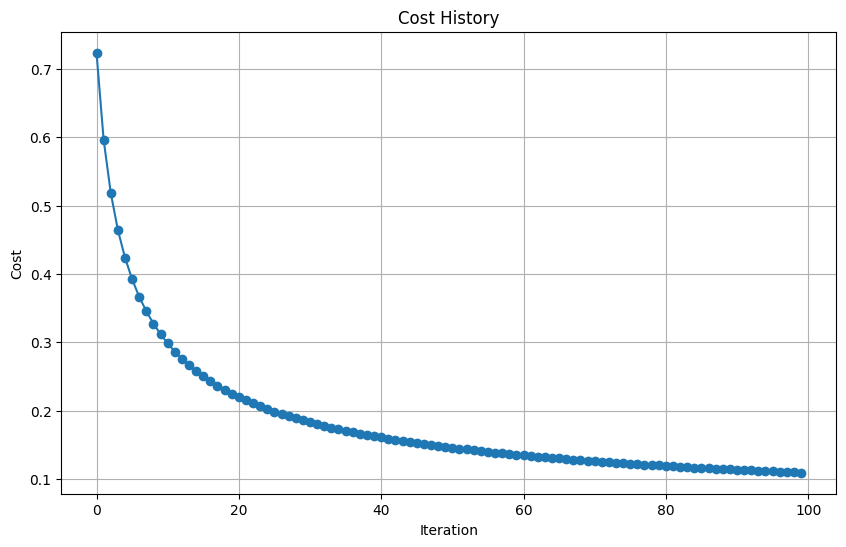

Validation set evaluation: 📊
Accuracy: 91.24% 🎯
Test set evaluation: 📊
Accuracy: 90.35% 🎯


{'accuracy': np.float64(90.35065267468646)}

In [ ]:
# Convert to sparse matrices
X_train = SparseMatrix(X_train)
X_val = SparseMatrix(X_val)
X_test = SparseMatrix(X_test)

# Define range of lambda values to test
lambdas = [0.01, 0.05, 0.1, 0.5, 1.0]

# Perform cross-validation to select the best lambda
# best_lambda: float | None = cross_validate_lambda(X_train, y_train, lambdas)
# print(f"Best Lambda: {best_lambda} 🏆")

best_lambda = 1e-3

alpha = 1e-1
max_iter = 100

# Train final model with the best lambda
mclr = MulticlassLogisticRegression(
        learning_rate=alpha,
        num_iterations=max_iter,
        regularization_strength=best_lambda,
)
theta, cost_history = mclr.fit(X_train, y_train)
mclr.pretty_print_cost_history(cost_history=cost_history)
# Evaluate on validation set
print("Validation set evaluation: 📊")
mclr.evaluate(X_test=X_val, y_test=y_val)
# Evaluate on test set
print("Test set evaluation: 📊")
mclr.evaluate(X_test, y_test)

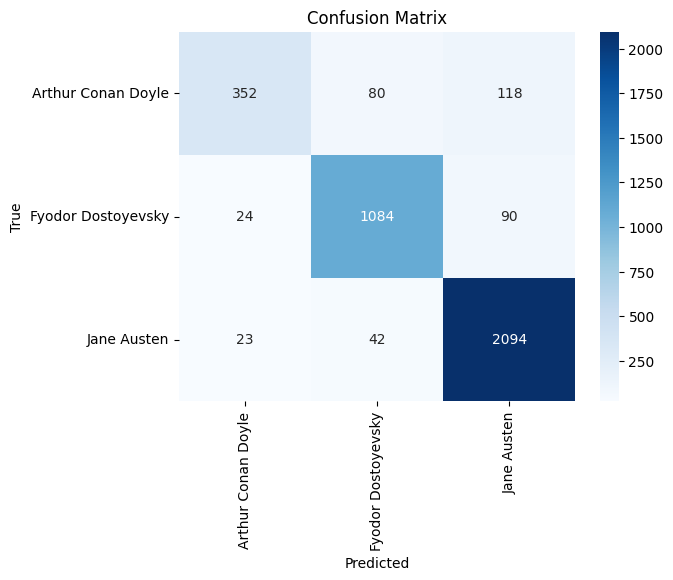

In [ ]:
mclr.get_confusion_matrix(X_test, y_test)

In [ ]:
SENTENCE_PREDICT = " I hope this is from Fyodor. "
processed_sentence: SparseMatrix = data.preprocess_single_sentence(sentence=SENTENCE_PREDICT)
# Predict the class
predicted_class = mclr.predict(X_test=processed_sentence)
labels = ['Arthur Conan Doyle', 'Fyodor Dostoyevsky', 'Jane Austen']
if predicted_class == 0:
    print(f"Predicted class: {labels[0]} 📚")
elif predicted_class == 1:
    print(f"Predicted class: {labels[1]} 📚")
elif predicted_class == 2:
    print(f"Predicted class: {labels[2]} 📚")


Predicted class: Fyodor Dostoyevsky 📚
